# This is the notebook to plot the results, like losses/rewards w.r.t iterations


In [1]:
import numpy as np 
import os 
import json 
import matplotlib.pyplot as plt
plt.style.use(['science','nature'])
cwd = os.getcwd() 
print(cwd)

/home/peiyongw/Desktop/Research/QAS-Qiskit


## Toffoli Resutls

## 422 Results

In [2]:
res_1_file_422 = '20211012-020301.json'
res_2_file_422 = '20211012-131536.json'
with open(os.path.join(cwd, res_1_file_422)) as f:
    res_422_dict_1 = json.load(f)

with open(os.path.join(cwd, res_2_file_422)) as f:
    res_422_dict_2 = json.load(f)

print(res_422_dict_1.keys())
print(res_422_dict_2.keys())

dict_keys(['task', 'pool', 'params', 'k', 'op_list', 'search_reward_list', 'fine_tune_loss'])
dict_keys(['task', 'pool', 'params', 'k', 'op_list', 'search_reward_list', 'fine_tune_loss'])


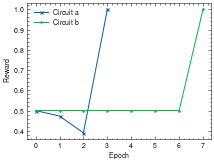

In [3]:
reward_list_1 = [c[2] for c in res_422_dict_1['search_reward_list']]
reward_list_2 = [c[2] for c in res_422_dict_2['search_reward_list']]
fig = plt.figure()
plt.plot(list(range(len(reward_list_1))), reward_list_1,linestyle = '-',marker = 'x', label = 'Circuit a')
plt.plot(list(range(len(reward_list_2))), reward_list_2,linestyle = '-',marker = '.', label = 'Circuit b')
plt.xticks(list(range(len(reward_list_2))))
#plt.title("Search Reward for [[4,2,2]] Code Encoding Circuit (1)")
plt.xlabel('Epoch')
plt.ylabel('Reward')
plt.legend()
plt.savefig('fig_422_rewards_1_2.pdf')

## $H_2$ Results

In [4]:
h2_with_only_neighbouring_cnots = '20211123-113657.json'
h2_with_all_cnots = '20211123-025029.json'
with open(os.path.join(cwd, h2_with_only_neighbouring_cnots)) as f:
    neighbouring_cnots = json.load(f)

with open(os.path.join(cwd, h2_with_all_cnots)) as f:
    all_cnots = json.load(f)

E_fci = -1.136189454088
Min_Energy = E_fci

In [5]:
nei_cnots_search_rewards = [s[2] for s in neighbouring_cnots['search_reward_list']]
neigh_cnots_fine_tune_loss = neighbouring_cnots['fine_tune_loss']
all_cnots_search_rewards = [s[2] for s in all_cnots['search_reward_list']]
all_cnots_fine_tune_loss = all_cnots['fine_tune_loss']

No handles with labels found to put in legend.


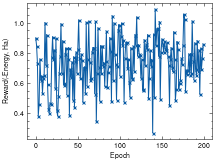

In [6]:
fig = plt.figure()
plt.plot(list(range(len(nei_cnots_search_rewards))), nei_cnots_search_rewards,marker = 'x')
plt.xlabel('Epoch')
plt.ylabel('Reward(-Energy, Ha)')
#plt.title("Search Reward with Only Neighbouring CNOTs")
plt.legend()
plt.savefig('fig_nei_cnots_search_rewards.pdf')

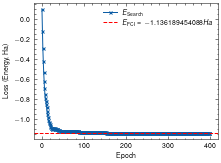

In [7]:
fig = plt.figure()
plt.plot(list(range(len(neigh_cnots_fine_tune_loss))), neigh_cnots_fine_tune_loss,label = r"$E_\mathrm{Search}$",linestyle = '-',marker = 'x')
plt.axhline(y = Min_Energy, color = 'r', linestyle = '--',label = r"$E_\mathrm{FCI}=-1.136189454088 Ha$")
#plt.title("Fine-tune Loss after Searching with Only Neighbouring CNOTs")
plt.xlabel('Epoch')
plt.ylabel('Loss (Energy, Ha)')
plt.legend()
plt.savefig('fig_neigh_cnots_fine_tune_loss.pdf')

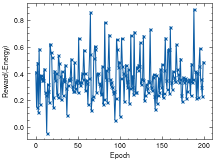

In [8]:
fig = plt.figure()
plt.plot(list(range(len(all_cnots_search_rewards))), all_cnots_search_rewards,marker = 'x')
#plt.title("Search Reward without Restrictions on CNOT Locations")
plt.xlabel('Epoch')
plt.ylabel('Reward(-Energy)')
plt.savefig('fig_all_cnots_search_rewards.pdf')

In [ ]:
fig = plt.figure()
plt.plot(list(range(len(all_cnots_fine_tune_loss))), all_cnots_fine_tune_loss,label = r"$E_\mathrm{Search}$",linestyle = '-',marker = 'x')
plt.axhline(y = Min_Energy, color = 'r', linestyle = '--',label = r"$E_\mathrm{FCI}=-1.136189454088Ha$")
plt.title("Fine-tune Loss after Search, No Restrictions on CNOT Locations")
plt.xlabel('Epoch')
plt.ylabel('Loss (Energy, Ha)')
plt.legend()